# cml1 - Immobilienrechner
## Explorative Datenanalyse

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import geopandas

In [2]:
df = pd.read_csv('../data/immo_data_clean.csv', low_memory=False)
df.head()

detail_responsive#municipality detail_responsive#surface_living  \
0                            NaN                              NaN   
1                            NaN                              NaN   
2                       Küttigen                            93 m²   
3                            NaN                              NaN   
4                            NaN                              NaN   

  detail_responsive#floor detail_responsive#surface_property  \
0                     NaN                                NaN   
1                     NaN                                NaN   
2                2. floor                                NaN   
3                     NaN                                NaN   
4                     NaN                                NaN   

  detail_responsive#surface_usable Gross return Municipality_merged  \
0                              NaN          NaN          Biberstein   
1                              NaN          NaN          Biberstein   
2                              NaN          NaN                 NaN   
3                              NaN          NaN          Biberstein   
4                              NaN          NaN            Küttigen   

   Floor_merged  Living_space_merged  Floor_space_merged  ...  \
0      4. floor                100.0                 NaN  ...   
1           NaN                156.0               242.0  ...   
2           NaN                  NaN                 NaN  ...   
3           NaN                154.0               257.0  ...   
4  Ground floor                142.0                 NaN  ...   

   description_detailed Floor space: Number of floors: Volume:     plz  \
0                   NaN          NaN               NaN     NaN  5023.0   
1                   NaN          NaN               NaN     NaN  5023.0   
2                   NaN          NaN               NaN     NaN  5022.0   
3                   NaN          NaN               NaN     NaN  5023.0   
4                   NaN          NaN               NaN     NaN  5022.0   

  Number of toilets: Gross yield:  Minimum floor space:  space_cleaned  \
0                NaN          NaN                   NaN            NaN   
1                NaN          NaN                   NaN            NaN   
2                NaN          NaN                   NaN            NaN   
3                NaN          NaN                   NaN            NaN   
4                NaN          NaN                   NaN            NaN   

   price_search  
0     1150000.0  
1     1420000.0  
2      720000.0  
3     1430000.0  
4      995000.0  

[5 rows x 99 columns]

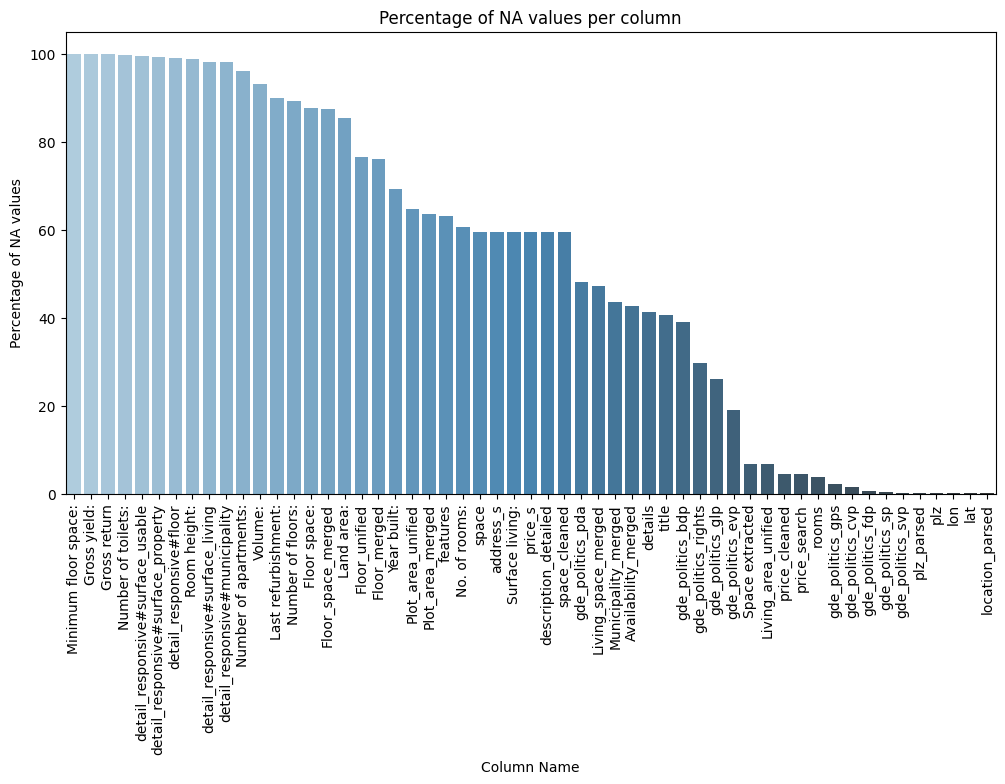

In [3]:
# Initialize an empty dictionary to store the column names and their corresponding NA percentages
na_percent_dict = {}

# Iterate over each column in the DataFrame
for col in df.columns:
    # Calculate the percentage of NA values in the column
    na_percent = round(df[col].isna().sum() / len(df[col]) * 100, 3)
    
    # If the percentage of NA values is greater than 0, add it to the dictionary
    if na_percent > 0.0:
        na_percent_dict[col] = na_percent

# Convert the dictionary to a Pandas Series for easier plotting
na_percent_series = pd.Series(na_percent_dict)

# Sort the series in descending order
na_percent_series = na_percent_series.sort_values(ascending=False)

# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# Create a bar plot of the NA percentages
sns.barplot(x=na_percent_series.index, y=na_percent_series.values, palette='Blues_d')

# Set the title and labels of the plot
plt.title('Percentage of NA values per column')
plt.xlabel('Column Name')
plt.ylabel('Percentage of NA values')

plt.xticks(rotation=90)

plt.show()

## Plots
Ich lege hier den Fokus hauptsächlich auf die Variablen **price_cleaned** und **type**

In [4]:
def distplot(df, col, b):
    sns.displot(df[col], kde = True, aspect = 1.5, bins = b)
    plt.title(col)
    plt.show()

def scatterplot(df, col1, col2):
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=df, x=col1, y=col2)
    plt.title(col1 + ' vs ' + col2)
    plt.show()

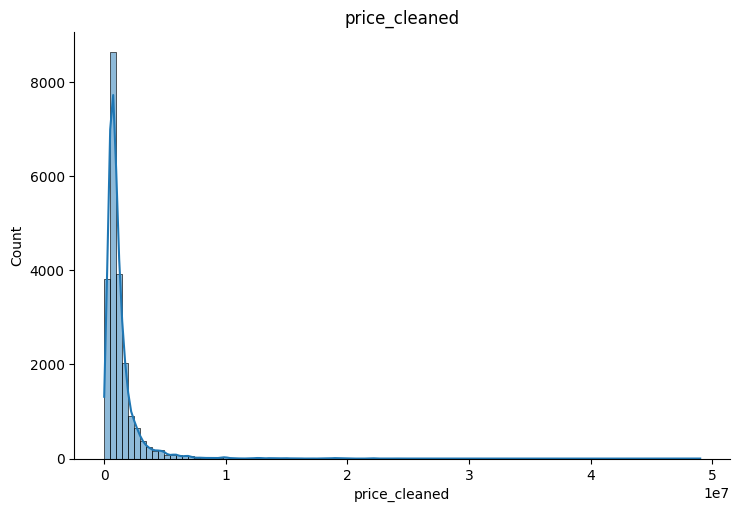

In [5]:
distplot(df, 'price_cleaned', 100)

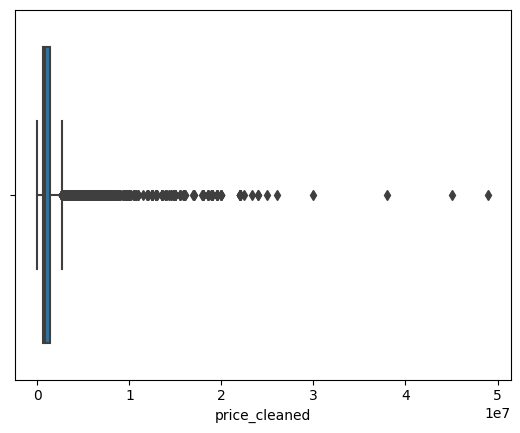

In [6]:
sns.boxplot(x=df['price_cleaned'])
plt.show()

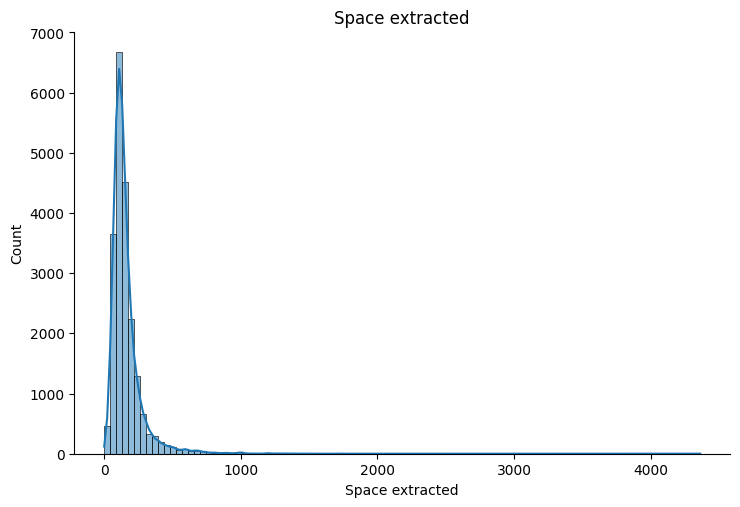

In [7]:
distplot(df, 'Space extracted', 100)

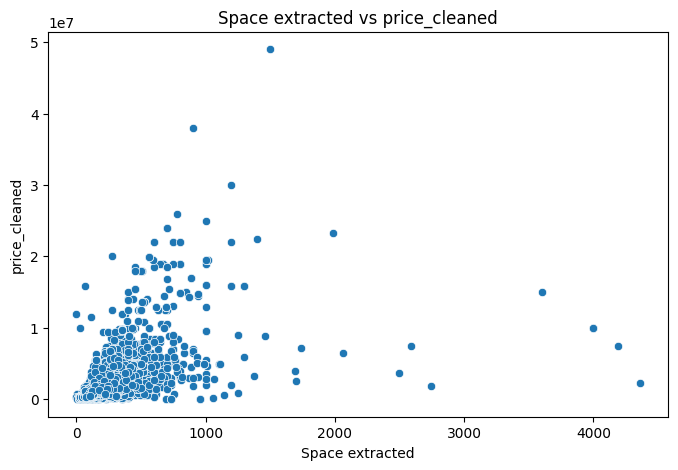

In [8]:
scatterplot(df, 'Space extracted', 'price_cleaned')

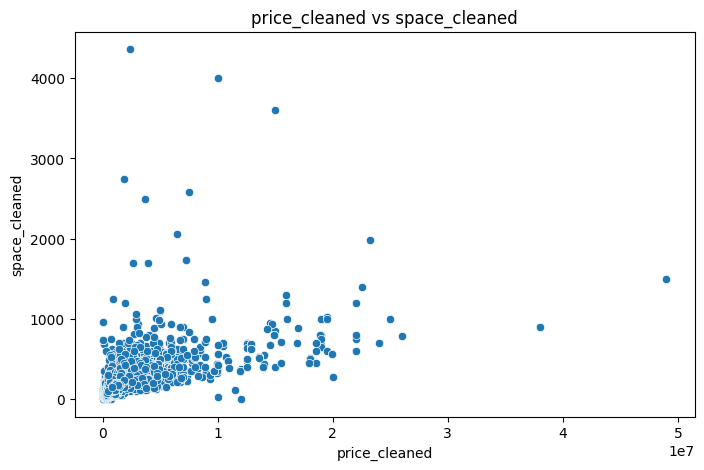

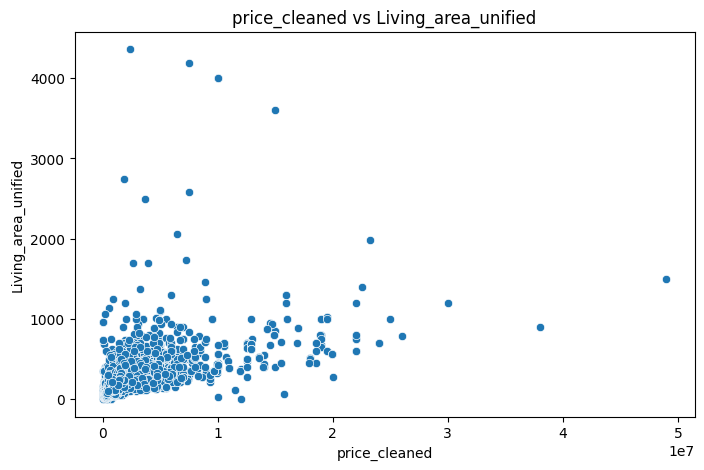

In [9]:
scatterplot(df, 'price_cleaned', 'space_cleaned')
scatterplot(df, 'price_cleaned', 'Living_area_unified')

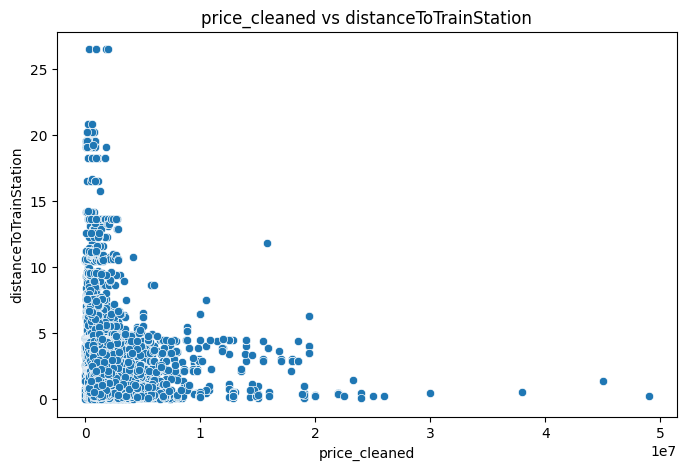

In [10]:
scatterplot(df, 'price_cleaned', 'distanceToTrainStation')

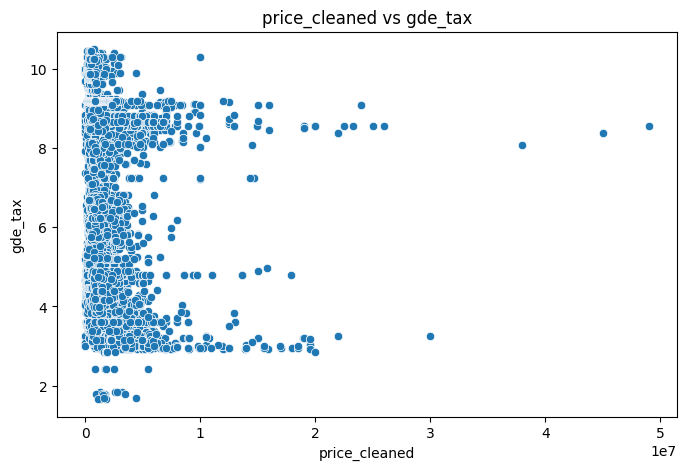

In [11]:
scatterplot(df, 'price_cleaned', 'gde_tax')

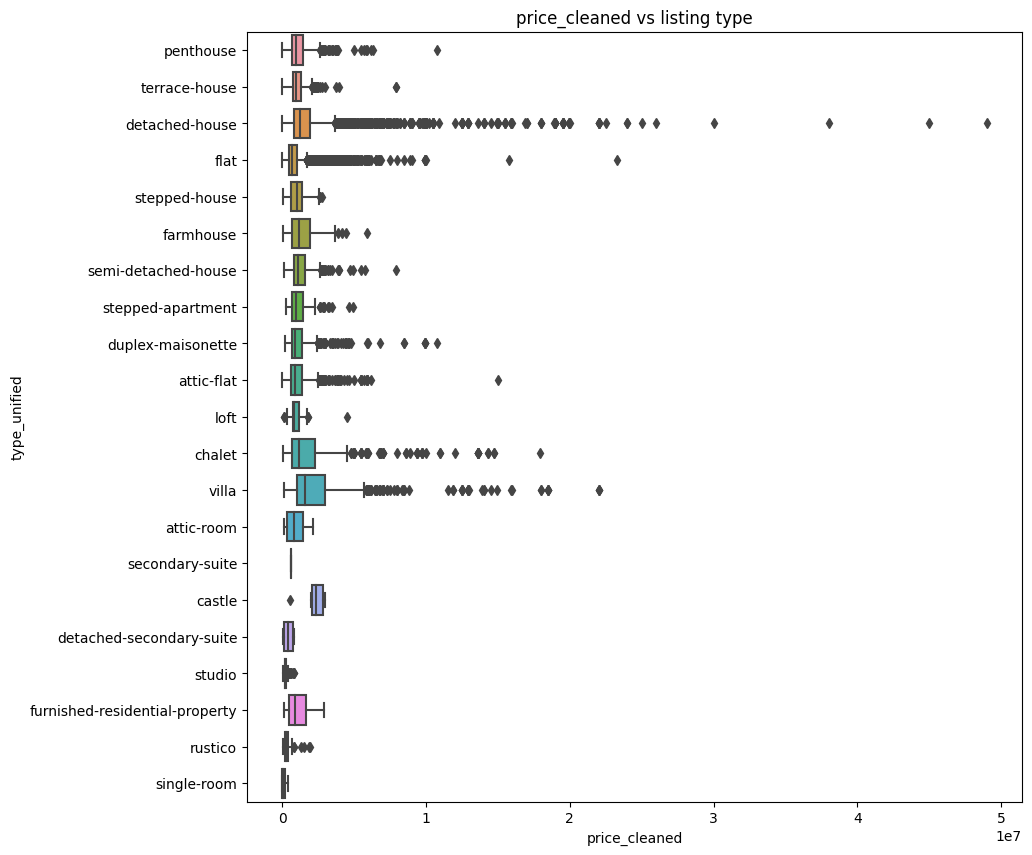

In [12]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=df, x='price_cleaned', y='type_unified')
plt.title('price_cleaned vs listing type')
plt.show()

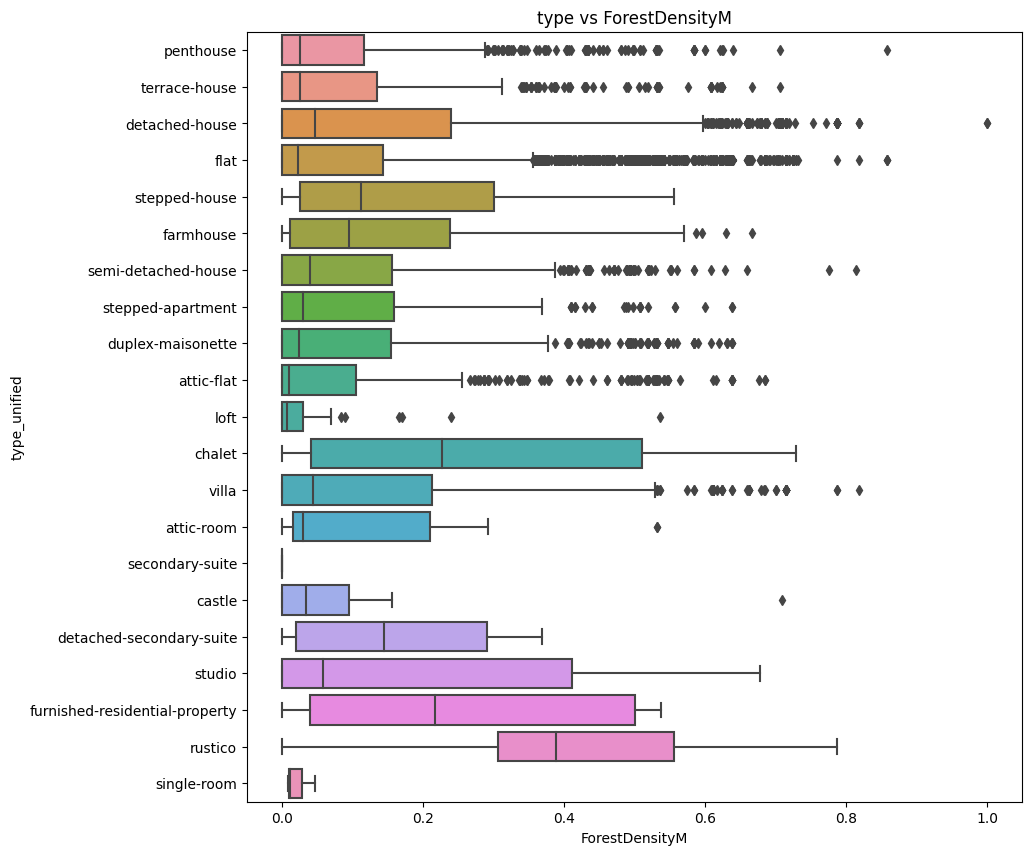

In [13]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=df, x='ForestDensityM', y='type_unified')
plt.title('type vs ForestDensityM')
plt.show()

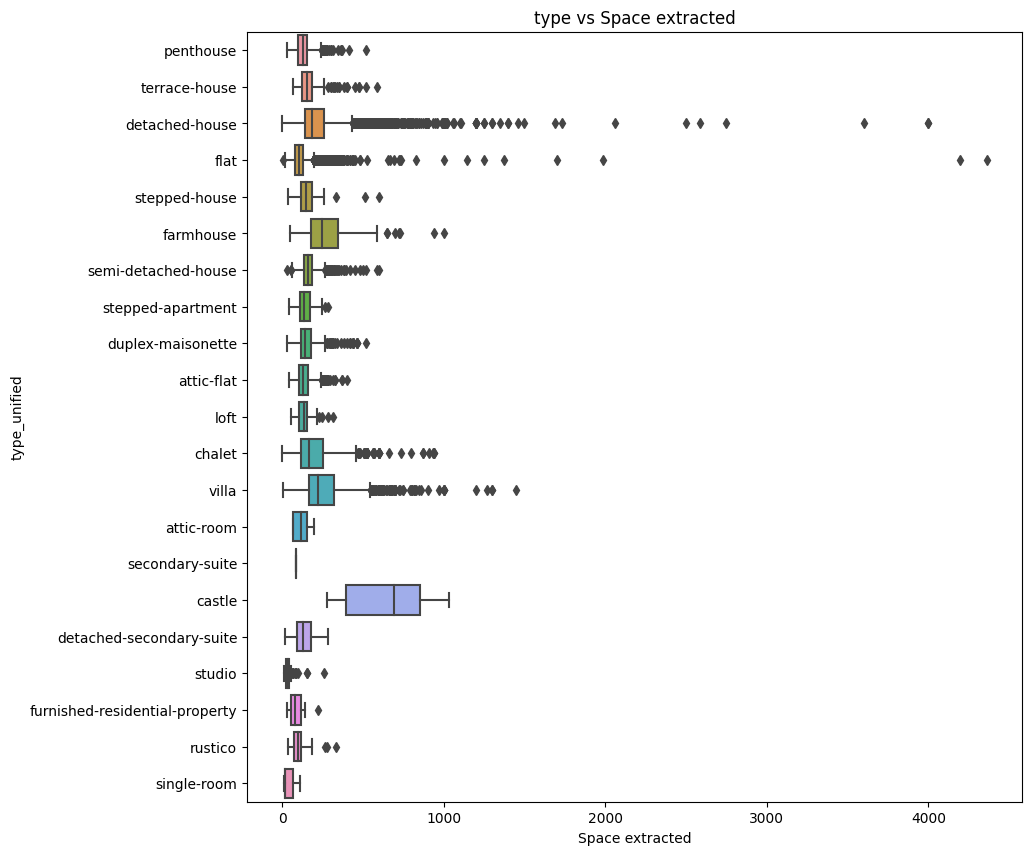

In [14]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=df, x='Space extracted', y='type_unified')
plt.title('type vs Space extracted')
plt.show()

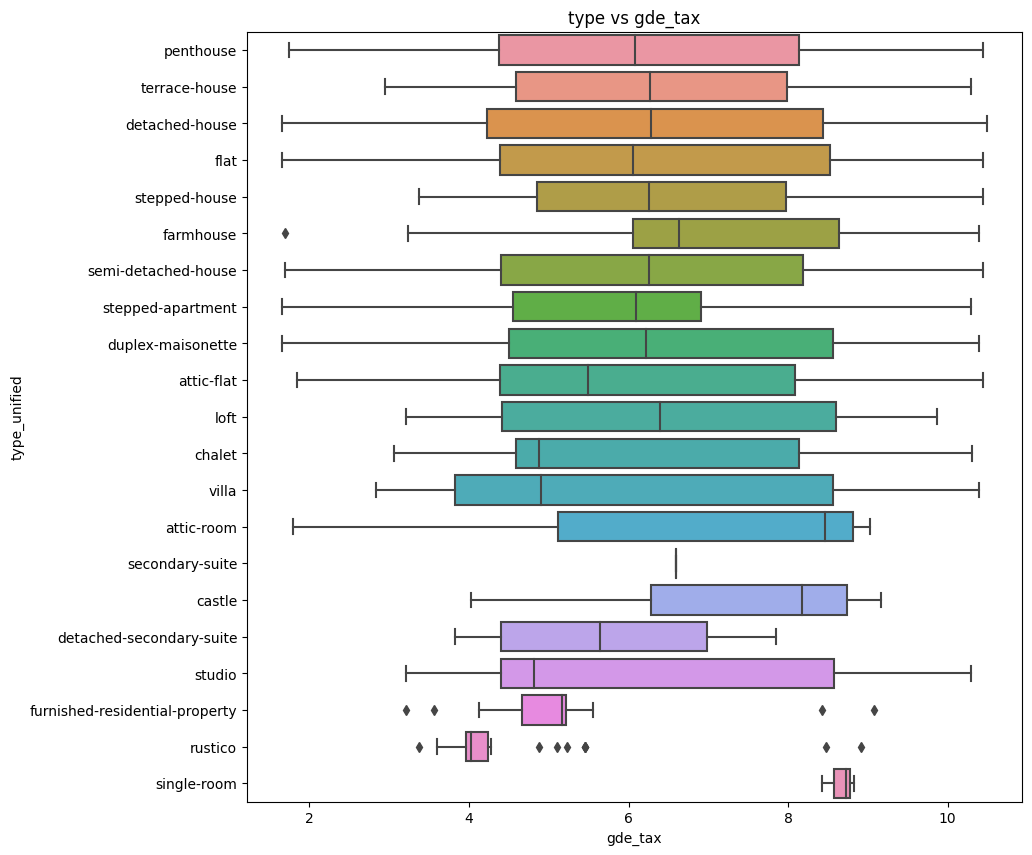

In [15]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=df, x='gde_tax', y='type_unified')
plt.title('type vs gde_tax')
plt.show()

locality count

In [16]:
df_locality_count = df.groupby('Municipality_merged')['Municipality_merged'].count().sort_values(ascending=False)
df_locality_count = df_locality_count.reset_index(name='count')

cities = ["Zürich", "Aarau", "Kloten", "Lugano", "Bern", "Basel", "Horgen"]

df_locality_count[df_locality_count["Municipality_merged"].isin(cities)]

Municipality_merged  count
0                Lugano    348
10                Basel     50
40                 Bern     32
45                Aarau     29
247              Horgen     16
479              Kloten      8

### Plot Part 2

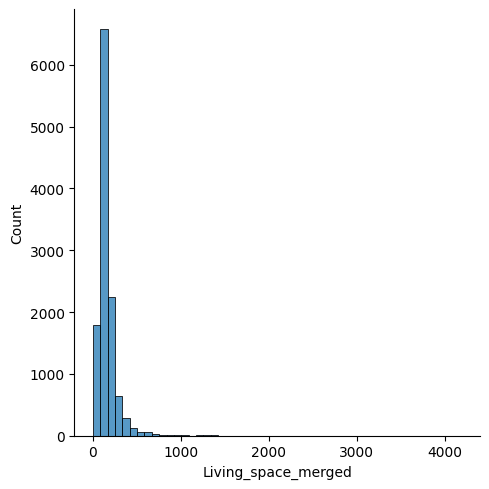

In [17]:
sns.displot(df['Living_space_merged'], bins=50)

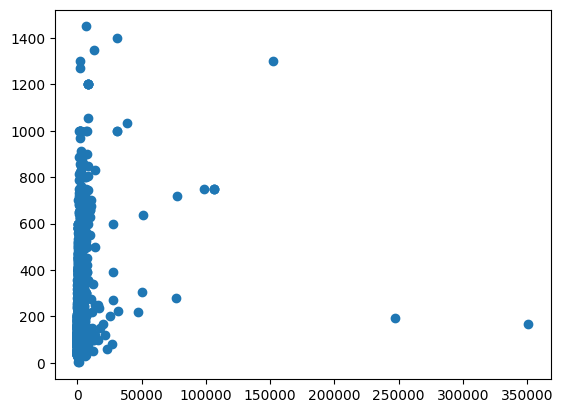

In [18]:
plt.scatter(df['Plot_area_merged'], df['Living_space_merged'])
plt.show()

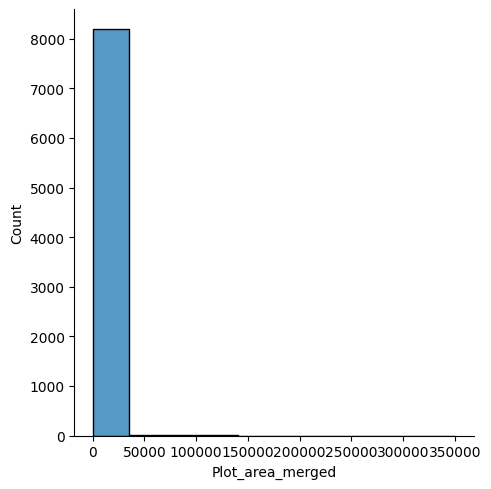

In [19]:
sns.displot(df['Plot_area_merged'], bins=10)

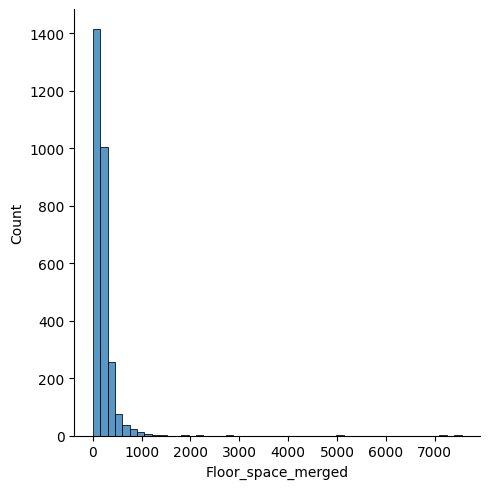

In [20]:
sns.displot(df['Floor_space_merged'], bins=50)

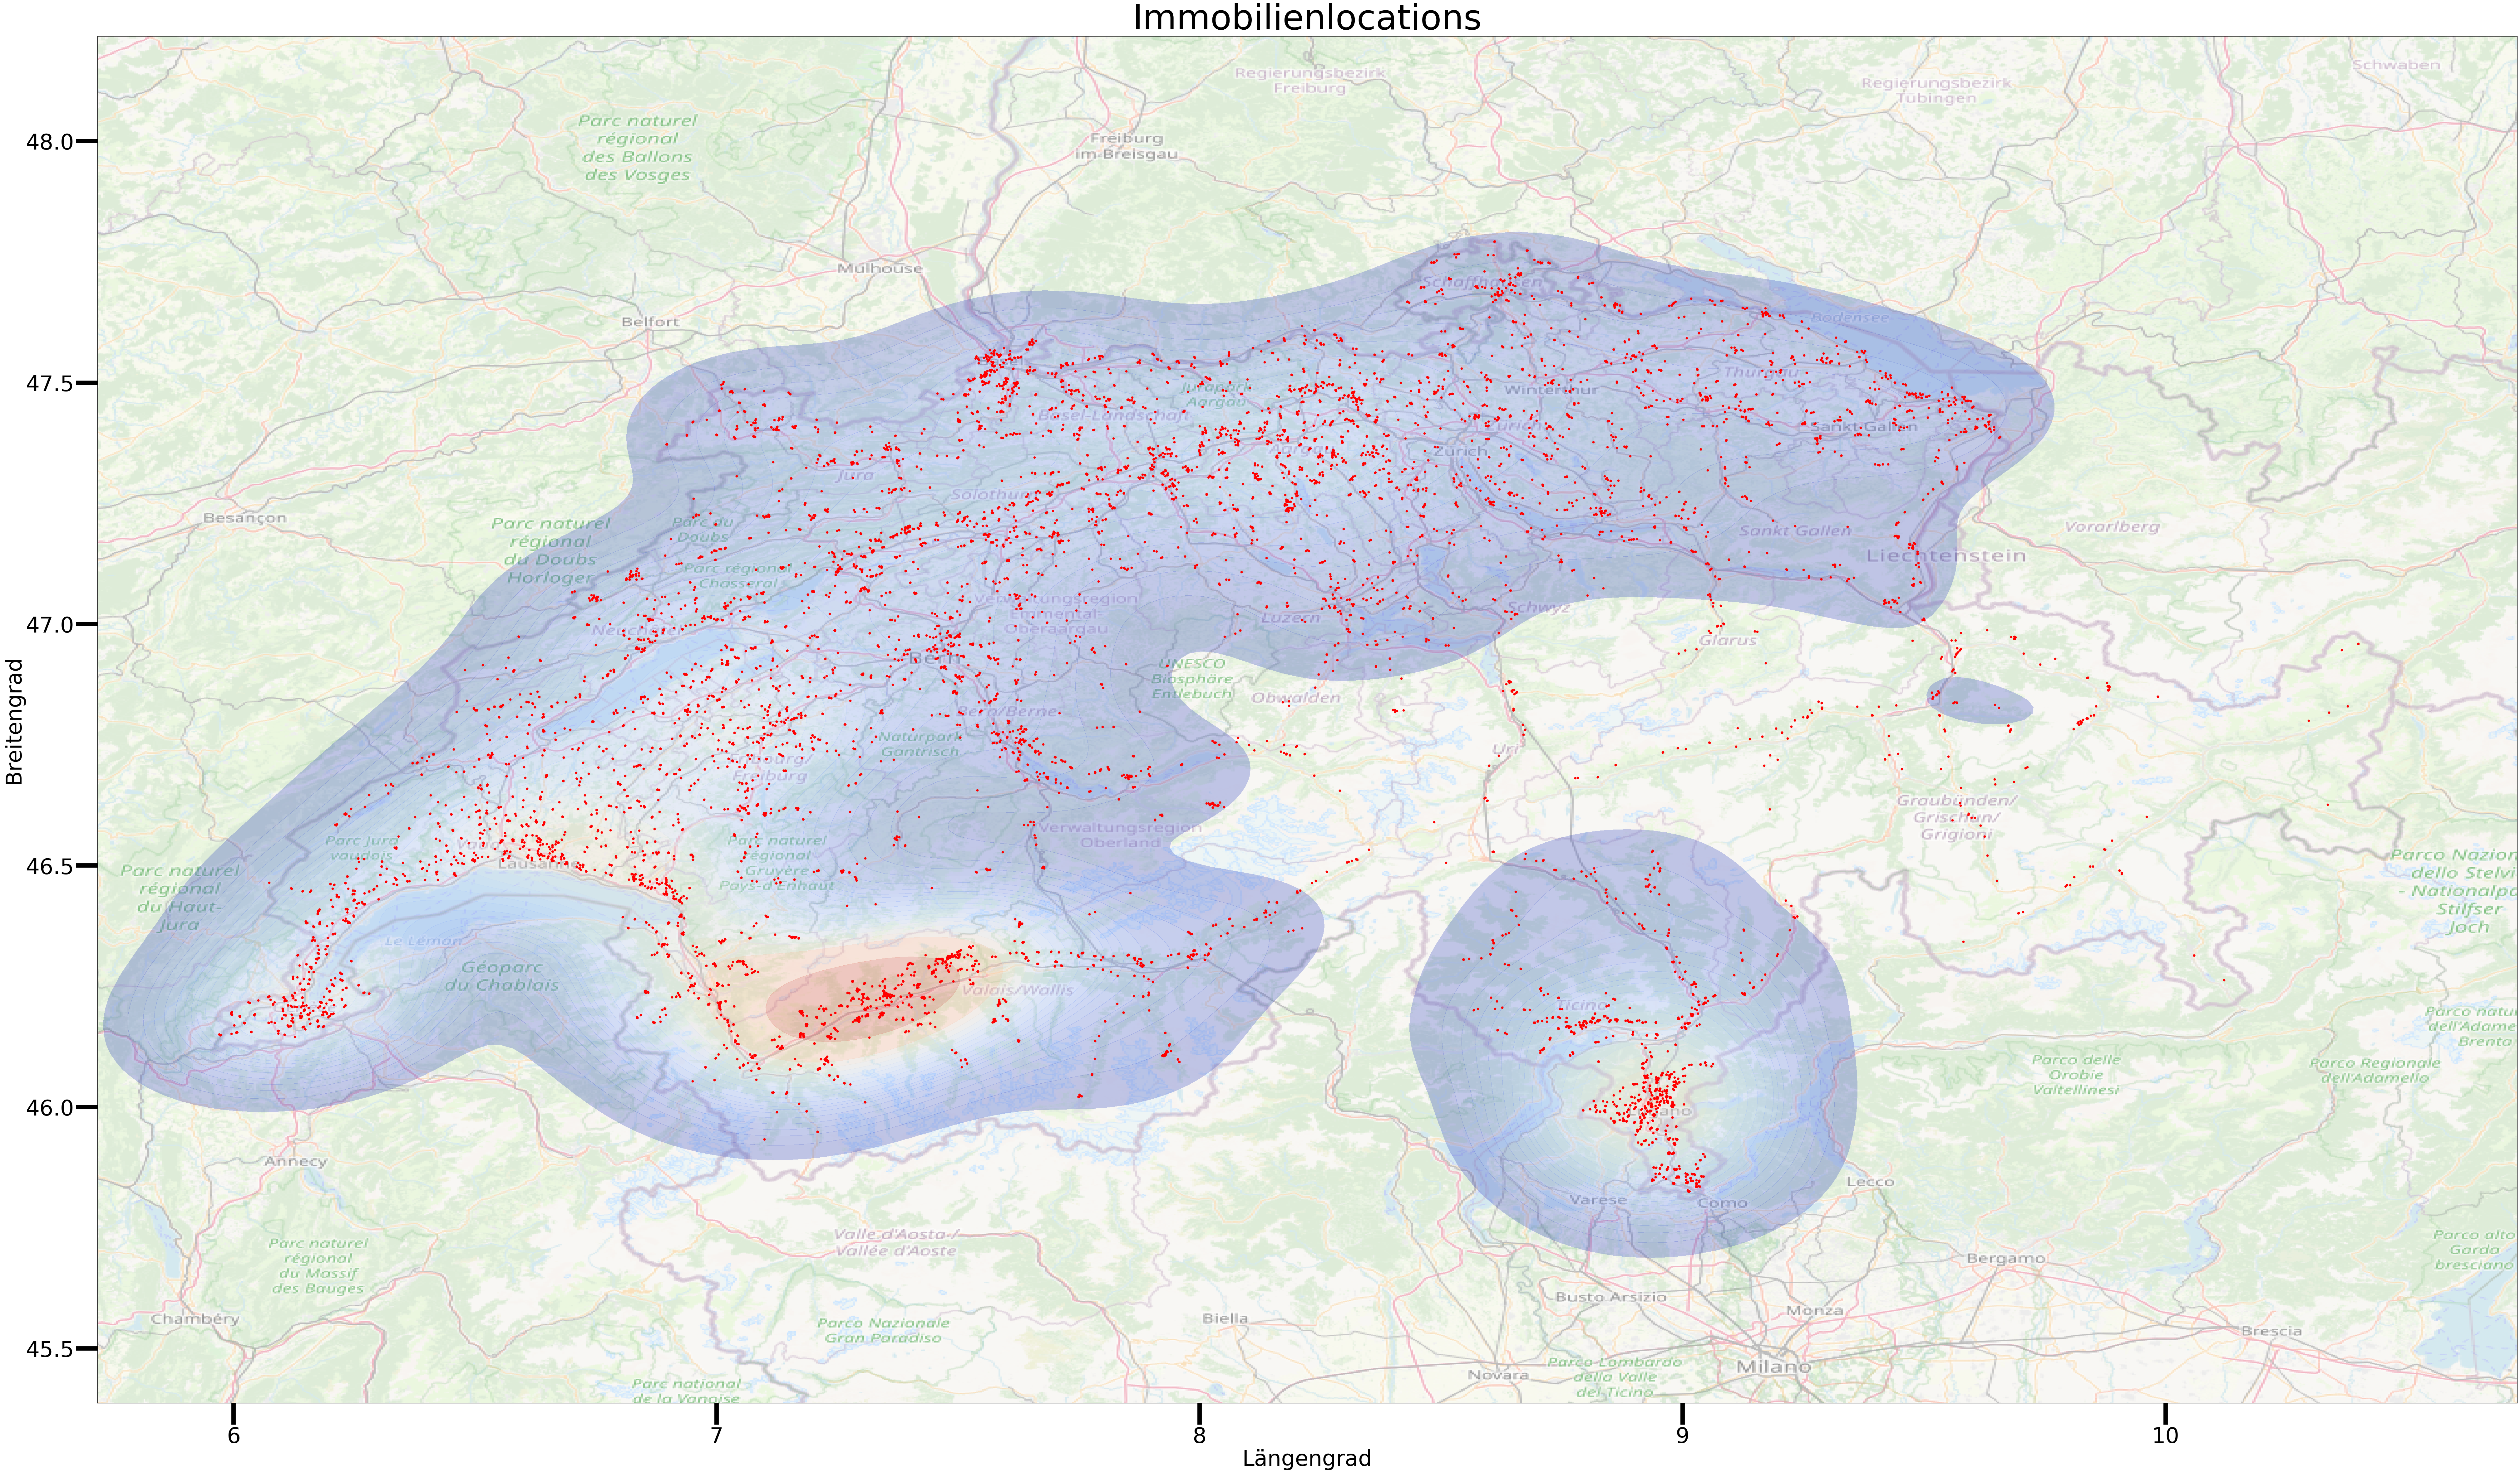

In [21]:
# plot lat and lon of df using geo pandas
gdf = geopandas.GeoDataFrame(df, geometry=geopandas.points_from_xy(df.lon, df.lat))



#png and coordinates in "BBox" from "https://www.openstreetmap.org/"
BBox = (5.718,  10.728,      
         45.387, 48.217)

pic = plt.imread('../Bilder/schweiz.png')

fig, ax = plt.subplots(figsize = (100,100))
ax.set_title('Immobilienlocations', fontsize=80)
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.set_xlabel('Längengrad', fontsize=50)
ax.set_ylabel('Breitengrad', fontsize=50)
ax.tick_params(axis='both', direction = "out", length = 50, width = 10, colors = "black", labelsize=50)
sns.kdeplot(data=gdf,
            x='lon', 
            y='lat', 
            fill=True,
            cmap='coolwarm',
            alpha=0.3, 
            gridsize=200,
            levels=20,
            ax=ax)
gdf.plot(markersize=20,ax=ax, color='red')
ax.imshow(pic, zorder=0, extent = BBox, aspect= 'equal', alpha = 0.5)

<AxesSubplot: xlabel='type_unified', ylabel='count'>

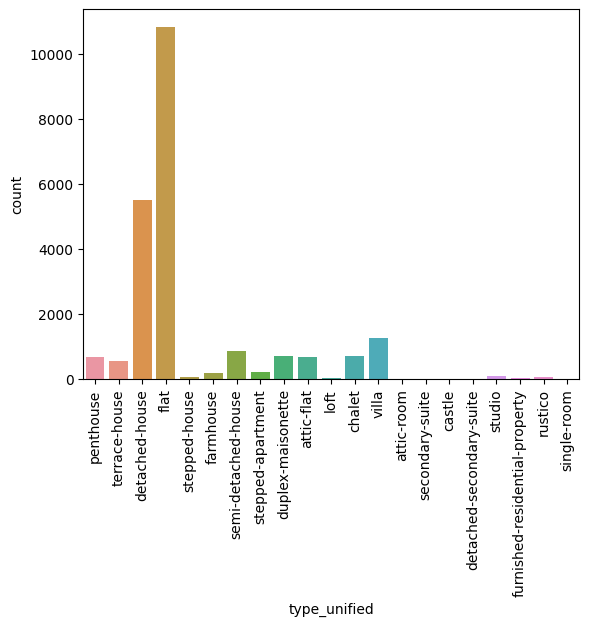

In [22]:

plt.xticks(rotation=90)
sns.countplot(x='type_unified', data=df)

<AxesSubplot: xlabel='type_unified', ylabel='count'>

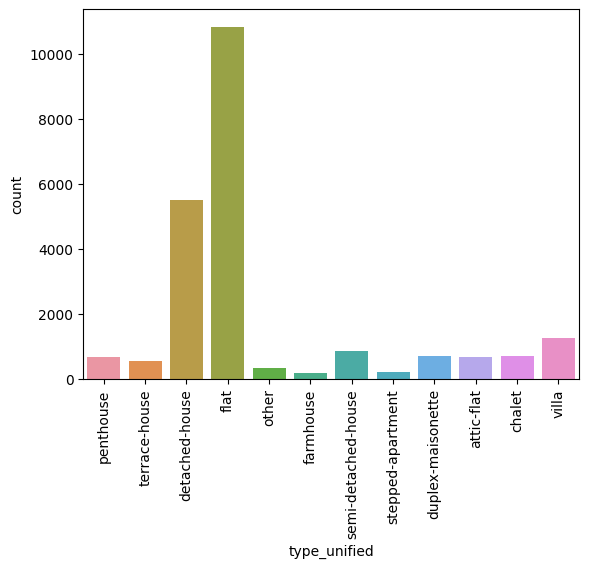

In [23]:
# make a list of types where the count is less than 100
types = df['type_unified'].value_counts()
types = types[types < 100]
types = types.index.tolist()
# replace those types with 'other'
df['type_unified'] = df['type_unified'].replace(types, 'other')
# plot the countplot again
plt.xticks(rotation=90)
sns.countplot(x='type_unified', data=df)